In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [10]:
def euler(M, T, S, sigma, r):
    dt = T/M
    S_values = np.zeros(M)
    S_values[0] = S

    for m in range(1, M):
        Zm = random.gauss(0, 1)
        S_values[m] = S_values[m-1] + r*S_values[m-1]*dt + sigma*S_values[m-1]*math.sqrt(dt)*Zm

    return S_values

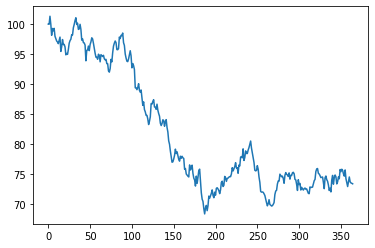

In [14]:
plt.plot(euler(M=365, T=1, S=100, sigma=0.2, r=0.06))